### Exploratory Data Analysis

In [1]:
# import pandas
import pandas as pd
%matplotlib inline

/home/saiteja_nalla/anaconda3/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
# Loading the dataset to pandas dataframe df
df = pd.read_csv("Reviews.csv")

# excluding the datapoints whose Score is 3
df = df[df.Score !=3]

In [3]:
df.shape

(525814, 10)

In [4]:
# Dropping the duplicates and checking the shape of dataset
df.drop_duplicates(subset=['ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','Score','Summary','Text']).shape

(525559, 10)

In [5]:
# Checking for Null and NAN's in dataset
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   25
Text                       0
dtype: int64

In [6]:
# Dropping all the datapoints having Null and NAN's
df = df.dropna(how='any')

In [7]:
# Checking whether the Null and NAN's have dropped
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [8]:
# Assigning review 0 for datapoints with Score 1,2
# Assigning review 1 for datapoints with Score 4,5
df['review'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)

In [9]:
# imports
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

**Observation :** 5 Star reviews constitute a larger proporion followed by 4 star reviews followed by 1 star then 2 star

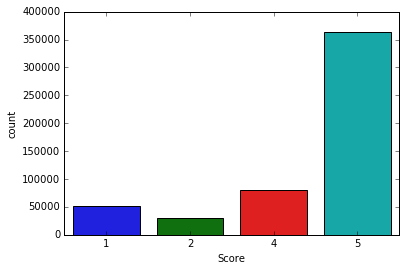

In [10]:
sns.countplot(x='Score',data=df)
plt.show()

** Observation :** Positive reviews are very common

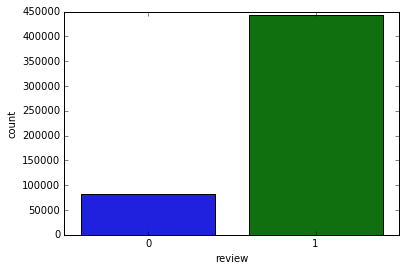

In [11]:
sns.countplot(x='review',data=df)
plt.show()

In [12]:
df1 = df
df1['Slength'] = df1.Summary.apply(len)
df1['Tlength'] = df1.Text.apply(len)

** Observation :** Positive reviews are shorter

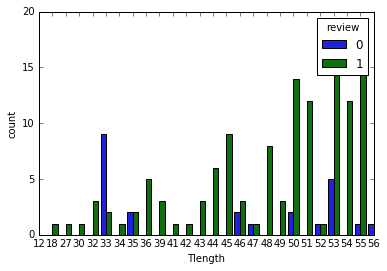

In [13]:
sns.countplot(x='Tlength',data=df1,hue='review')
plt.xlim(0,25)
plt.ylim(0,20)
plt.show()

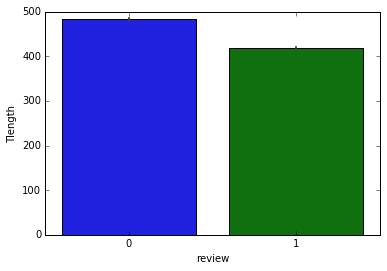

In [14]:
sns.barplot(x='review',y='Tlength',data=df)
plt.show()

In [15]:
df1.sort_values('HelpfulnessNumerator',ascending=False,inplace=True)

**Observation : **Tlength is kind of log normally distributed

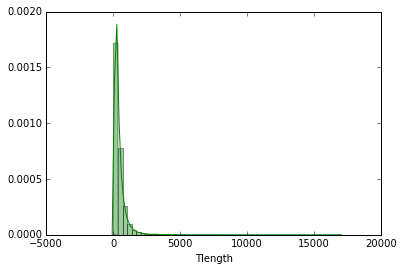

In [16]:
sns.distplot(df1['Tlength'],kde=True,color='g')
plt.show()

** Observation : **Positive reviews are more helpful despite being common and short

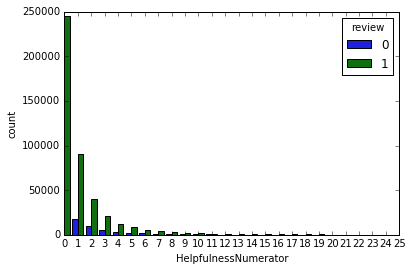

In [17]:
sns.countplot(x='HelpfulnessNumerator',data=df1,hue='review')
plt.xlim(0,25)
plt.show()

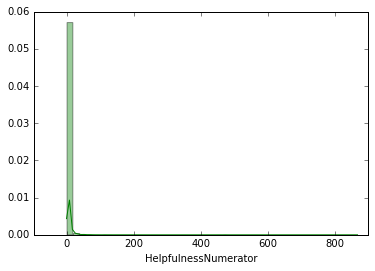

In [18]:
sns.distplot(df1['HelpfulnessNumerator'],kde=True,color='g')
plt.show()

In [19]:
meanLength = df1['Tlength'].mean()
meanLength

429.42163062766633

In [20]:
df1['MeanLen'] = df1['Tlength'].apply(lambda x: 1 if x > meanLength else 0)

** Observations : - **
- Longer Reviews are more helpful
- Reviews in Blue(0) are reviews with lenth less than mean length(inclusive).
- Reviews in Green(1) are reviews with lenth greater than mean length.

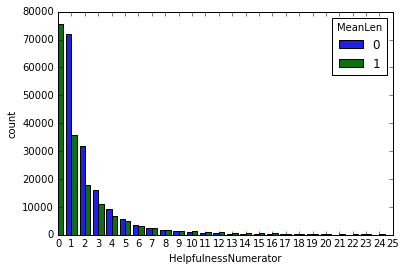

In [21]:
sns.countplot(x='HelpfulnessNumerator',data=df1,hue='MeanLen')
plt.xlim(0,25)
plt.ylim(0,80000)
plt.show()

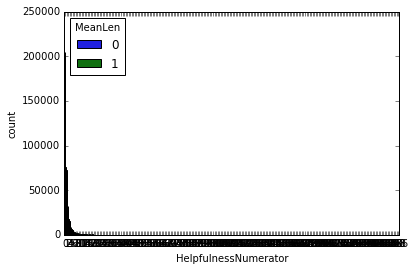

In [22]:
sns.countplot(x='HelpfulnessNumerator',data=df1,hue='MeanLen')
#sns.plt.xlim(0,25)
#sns.plt.ylim(0,80000)
plt.show()

### Bag of words

In [23]:
# Taking the Summary and Review to X and Y respectively
X = df['Summary']
Y = df['review']

In [24]:
print(X.shape)
print(Y.shape)

(525773,)
(525773,)


In [25]:
X.head()

190733                 Works as Advertised - Classy Product
566779                                sauce not for mortals
235722                           Lost in Translation: Truth
467800    Works great! But how does it compare to Solofi...
385450    Works great! But how does it compare to Solofi...
Name: Summary, dtype: object

In [26]:
# split X and y into training and testing sets
# by default, it splits 75% training and 25% test
# random_state=1 for reproducibility
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

/home/saiteja_nalla/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(394329,)
(131444,)
(394329,)
(131444,)


In [27]:
# Converting train and test sets of X and Y to lists
x_train = X_train.values.tolist()
Y_train = y_train.values.tolist()
x_test = X_test.values.tolist()
Y_test = y_test.values.tolist()

In [28]:
# imports
from nltk import word_tokenize          
from nltk.stem.porter import PorterStemmer
import string

In [29]:
stemmer = PorterStemmer()
# defining a stem function to stem the token
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed
# defining a tokenize function to tokenize the text remove punctuation and call stem_tokens
# this tokenize function shall be integrated in CountVectorizer
def tokenize(text):
    text = "".join([ch for ch in text if ch not in string.punctuation])
    tokens = word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

In [30]:
# import
from sklearn.feature_extraction.text import CountVectorizer

# instantiate CountVectorizer
# this will also do all the prepocessing of stemming, removing punctuation and stop words
# tokenize function is integrated to do all preprocessing steps
vect = CountVectorizer(tokenizer=tokenize, stop_words='english')

In [31]:
# fit
# learn the 'vocabulary' of the training data
vect.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function tokenize at 0x7ff46d2f58c8>, vocabulary=None)

In [32]:
vect.get_feature_names()

['0',
 '00',
 '001',
 '00g',
 '02',
 '020',
 '021512',
 '03',
 '031412',
 '032811',
 '042oz',
 '043',
 '045oz',
 '05',
 '05oz',
 '06',
 '060',
 '062',
 '06202',
 '0625',
 '0631',
 '069cup',
 '06sep12',
 '07',
 '070308',
 '0712',
 '07132009',
 '075',
 '078',
 '08',
 '081fl',
 '088can',
 '09',
 '09062011',
 '092311',
 '097ounc',
 '0f',
 '0g',
 '0s',
 '0z',
 '1',
 '10',
 '100',
 '1000',
 '10000',
 '1000count',
 '1002851',
 '100999',
 '100calori',
 '100count',
 '100g',
 '100gr',
 '100gram',
 '100pack',
 '101',
 '1010',
 '101212',
 '10122012',
 '1015',
 '102',
 '102011',
 '102012',
 '102508',
 '103',
 '104',
 '1040',
 '105',
 '1058',
 '105ounc',
 '106832',
 '1073',
 '108',
 '10812',
 '10910',
 '1095',
 '1099',
 '10am',
 '10count',
 '10g',
 '10lb',
 '10mo',
 '10month',
 '10ounc',
 '10oz',
 '10pack',
 '10piec',
 '10star',
 '10th',
 '10x',
 '10yearold',
 '11',
 '110',
 '1100',
 '1100am',
 '1114',
 '1115ounc',
 '111811',
 '11182011',
 '112',
 '112ounc',
 '113',
 '1148',
 '115',
 '1150',
 '115ou

In [33]:
# transform train data
X_train_bog = vect.transform(x_train)

In [34]:
X_train_bog

<394329x28247 sparse matrix of type '<class 'numpy.int64'>'
	with 1113625 stored elements in Compressed Sparse Row format>

In [35]:
# transform test data to bog
X_test_bog = vect.transform(x_test)
X_test_bog

<131444x28247 sparse matrix of type '<class 'numpy.int64'>'
	with 365612 stored elements in Compressed Sparse Row format>

### Function to plot the confusion matrix

In [36]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Generic function to run any model specified

In [37]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Blues):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    
    

### Method to print the gridsearch Attributes

In [38]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

    
    

### Naive Bayes model

In [31]:
# import
from sklearn.naive_bayes import MultinomialNB

# instantiate a Multinomial Naive bayes model
nb = MultinomialNB()

In [108]:
labels = ['0','1']

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:00.166028


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.008853


---------------------
|      Accuracy      |
---------------------

    0.9058382276863151


--------------------
| Confusion Matrix |
--------------------

 [[ 11564   8965]
 [  3412 107503]]


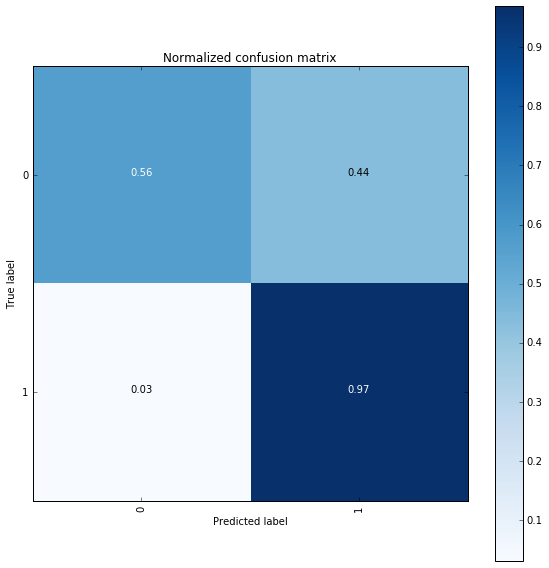

-------------------------
| Classifiction Report |
-------------------------
             precision    recall  f1-score   support

          0       0.77      0.56      0.65     20529
          1       0.92      0.97      0.95    110915

avg / total       0.90      0.91      0.90    131444



In [113]:
naive_bayes_results =  perform_model(nb, X_train_bog, Y_train, X_test_bog, Y_test, class_labels=labels)

In [42]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

In [43]:
import matplotlib.pyplot as plt

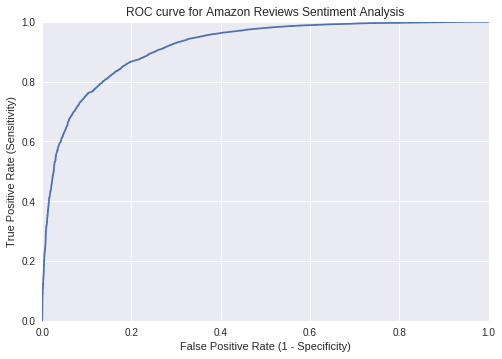

In [49]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Amazon Reviews Sentiment Analysis')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

### Logistic Regression Model

In [118]:
from sklearn import linear_model

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Done 
 

training_time(HH:MM:SS.ms) - 0:04:14.922552


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.077003


---------------------
|      Accuracy      |
---------------------

    0.9137351267459907


--------------------
| Confusion Matrix |
--------------------

 [[ 12261   8268]
 [  3071 107844]]


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  2.5min finished


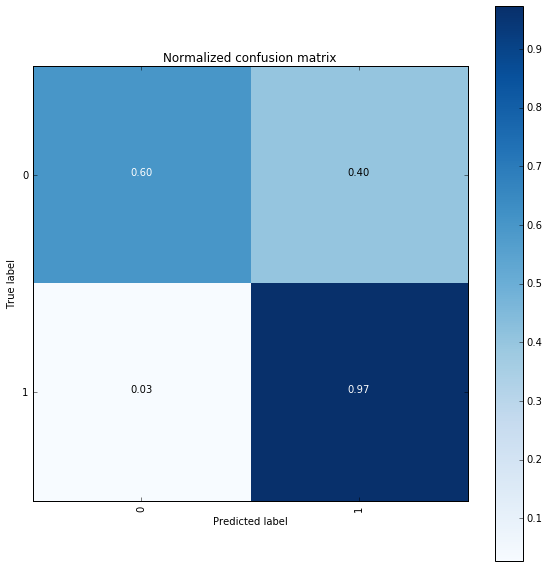

-------------------------
| Classifiction Report |
-------------------------
             precision    recall  f1-score   support

          0       0.80      0.60      0.68     20529
          1       0.93      0.97      0.95    110915

avg / total       0.91      0.91      0.91    131444



In [119]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
logr = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(logr, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid,X_train_bog, Y_train, X_test_bog, Y_test, class_labels=labels)

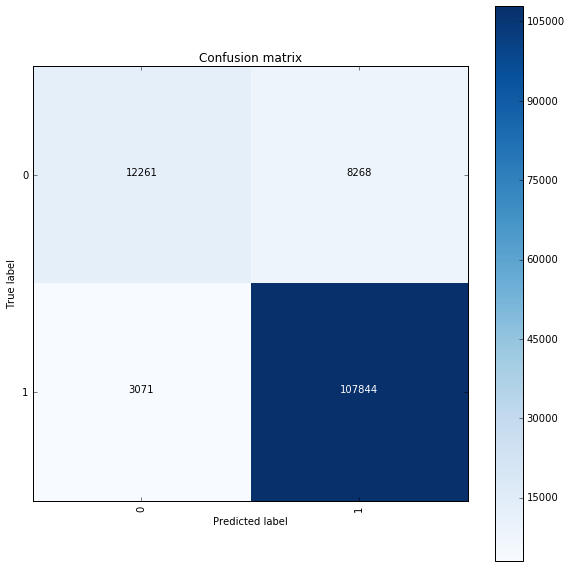

In [124]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Blues, )
plt.show()

In [120]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 10, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9125248206446901



### Linear SVM Model

In [129]:
from sklearn.svm import LinearSVC

training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Done 
 

training_time(HH:MM:SS.ms) - 0:04:30.683234


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.003741


---------------------
|      Accuracy      |
---------------------

    0.9129286996743861


--------------------
| Confusion Matrix |
--------------------

 [[ 11725   8804]
 [  2641 108274]]


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  3.9min finished


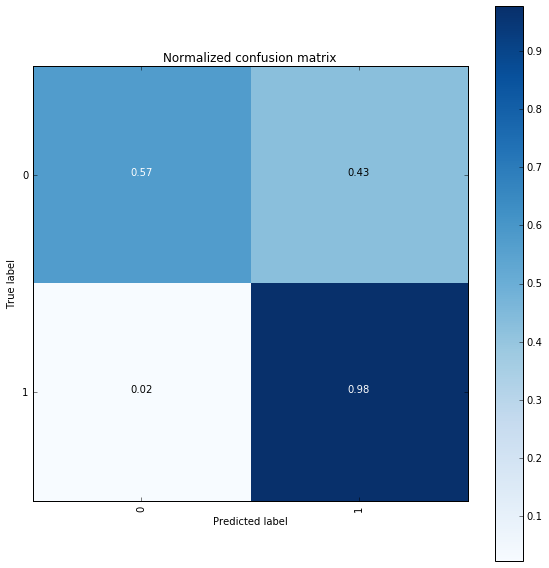

-------------------------
| Classifiction Report |
-------------------------
             precision    recall  f1-score   support

          0       0.82      0.57      0.67     20529
          1       0.92      0.98      0.95    110915

avg / total       0.91      0.91      0.91    131444



In [130]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train_bog, Y_train, X_test_bog, Y_test, class_labels=labels)

In [131]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
     verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.5}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9117209233913813



### SVM with rbf kernel

In [132]:
df.shape

(525773, 14)

- **SVM with rbf kernel is computationally very expensive as the dataset is very large**
- **We can randomly sample the dataset to 5% of the original and train SVM with rbf kernel**

In [133]:
df1 = df.sample(frac=0.05)

In [134]:
len(df1)

26289

In [135]:
X1 = df1['Summary']
Y1 = df1['review']

In [136]:
print(X1.shape)
print(Y1.shape)

(26289,)
(26289,)


In [137]:
X1.head()

193542                       Great taste!
541146                Agava Nectar  Light
314127    Great for pasta and pizza dough
323447                Cures munchies*****
11443                    wedding pretzels
Name: Summary, dtype: object

In [138]:
# split X and y into training and testing sets
# by default, it splits 75% training and 25% test
# random_state=1 for reproducibility
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, random_state=1)

In [139]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(19716,)
(6573,)
(19716,)
(6573,)


In [140]:
x1_train = X1_train.values.tolist()
Y1_train = y1_train.values.tolist()
x1_test = X1_test.values.tolist()
Y1_test = y1_test.values.tolist()

In [141]:
# fit
# learn the 'vocabulary' of the training data
vect.fit(x1_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function tokenize at 0x7ff3c1983d90>, vocabulary=None)

In [142]:
vect.get_feature_names()

['0',
 '05',
 '0631',
 '0s',
 '0z',
 '1',
 '10',
 '100',
 '1000',
 '100calori',
 '102011',
 '105',
 '1050',
 '10count',
 '10oz',
 '11',
 '110',
 '11182011',
 '12',
 '120mg',
 '125',
 '125pound',
 '126oz',
 '128',
 '12gram',
 '12oz',
 '12pack',
 '13',
 '132ounc',
 '133',
 '1360',
 '14',
 '140',
 '1470mg',
 '1499',
 '14mo',
 '14yr',
 '15',
 '150awesom',
 '1519',
 '15oz',
 '16',
 '160',
 '16ounc',
 '17',
 '1723gallon',
 '180',
 '1866',
 '1877',
 '18month',
 '19',
 '192ouncepack',
 '1987',
 '199',
 '1oz',
 '1st',
 '2',
 '20',
 '200',
 '2008',
 '2010',
 '2011',
 '2012',
 '205',
 '208',
 '20ounc',
 '20pound',
 '21',
 '22',
 '2225',
 '229',
 '2399',
 '23oz',
 '24',
 '25',
 '250',
 '25count',
 '267',
 '2699',
 '27',
 '2725',
 '28mg',
 '29',
 '299',
 '2inch',
 '2nd',
 '2star',
 '3',
 '30',
 '3000',
 '30pack',
 '32',
 '32oz',
 '33ounc',
 '35',
 '350',
 '36',
 '3am',
 '3g',
 '3ounc',
 '3rd',
 '3yearold',
 '3yo',
 '4',
 '40',
 '40th',
 '40year',
 '42',
 '425',
 '45',
 '45ounc',
 '48',
 '495',
 '4c

In [143]:
# transform train data
X1_train_bog = vect.transform(x1_train)

In [144]:
X1_train_bog

<19716x6130 sparse matrix of type '<class 'numpy.int64'>'
	with 55469 stored elements in Compressed Sparse Row format>

In [145]:
# transform test data to bog
X1_test_bog = vect.transform(x1_test)
X1_test_bog

<6573x6130 sparse matrix of type '<class 'numpy.int64'>'
	with 17471 stored elements in Compressed Sparse Row format>

In [148]:
# allocating the cache_size of 1600 MB to increase the computation speed by increasing the cache
# Note that cache_size greater than 2000 MB decreases the speed and doesn't allocated RAM to cache(sklearn bug) 

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:25:21.677714


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:02.869919


---------------------
|      Accuracy      |
---------------------

    0.9005020538566865


--------------------
| Confusion Matrix |
--------------------

 [[ 497  530]
 [ 124 5422]]


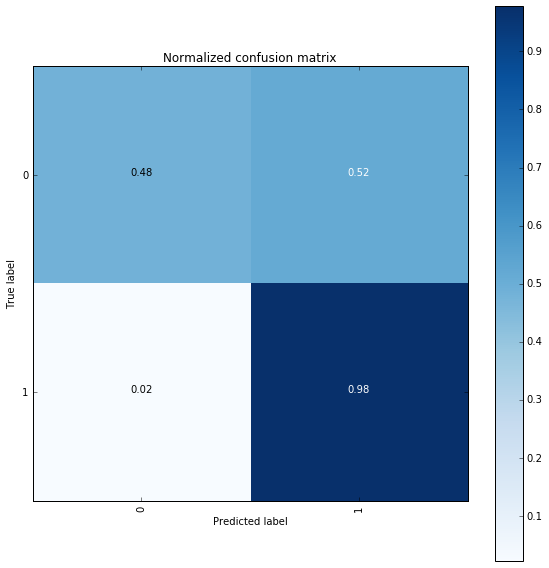

-------------------------
| Classifiction Report |
-------------------------
             precision    recall  f1-score   support

          0       0.80      0.48      0.60      1027
          1       0.91      0.98      0.94      5546

avg / total       0.89      0.90      0.89      6573



In [146]:
from sklearn.svm import SVC
parameters = {'C':[2,4,8,16],\
              'gamma': [ 0.0078125, 0.125,0.25, 2]}
rbf_svm = SVC(kernel='rbf',cache_size = 1600,probability = True)
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X1_train_bog, Y1_train, X1_test_bog, Y1_test, class_labels=labels)

In [147]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=4, cache_size=1600, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.125, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 4, 'gamma': 0.125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.8930817610062893



In [91]:
# allocating the cache_size of 1600 MB to increase the computation speed by increasing the cache
# Note that cache_size greater than 2000 MB decreases the speed and doesn't allocated RAM to cache(sklearn bug) 
svr = SVC(kernel = 'rbf',cache_size = 1600,probability = True)

- **SVM with rbf kernel sampling the dataframe to 5% of the original data 10 times. Cummulatively we're sampling 50% of the data randomly.**

### Tfidf

In [39]:
# Function to split train and test
from sklearn.model_selection import train_test_split

def split_train_test(X,Y):
    return train_test_split(X, Y, test_size=0.33, random_state=42)

In [40]:
x_train, x_test, y_train, y_test = split_train_test(df1['Summary'],df1['review'])

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer

In [42]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(x_train.values)

In [43]:
X_train_tf = tf_idf_vect.transform(x_train)
X_test_tf = tf_idf_vect.transform(x_test)

In [44]:
final_tf_idf.get_shape()

(352267, 243701)

In [45]:
features = tf_idf_vect.get_feature_names()
len(features)


243701

In [46]:
features[243500:243701]

['zinger and',
 'zinger cinnamon',
 'zinger flavor',
 'zinger herb',
 'zinger herbal',
 'zinger ice',
 'zinger tea',
 'zinger was',
 'zingers',
 'zingy',
 'zingy taste',
 'zingy tasty',
 'zingy yes',
 'zip',
 'zip and',
 'zip dee',
 'zip forever',
 'zip in',
 'zip lock',
 'zip to',
 'zip top',
 'zipfizz',
 'zipfizz flavor',
 'zipfizz for',
 'zipfizz grape',
 'zipfizz is',
 'zipfizz liquid',
 'zipfizz orange',
 'zipfizz order',
 'ziploc',
 'ziplock',
 'ziplock healthier',
 'ziplock needed',
 'zipp',
 'zipp fizz',
 'zipper',
 'zipper broke',
 'zipper top',
 'zipper would',
 'zippered',
 'zippered case',
 'zippy',
 'zippy coca',
 'zippy lime',
 'zippy salad',
 'zippy sauce',
 'zippy tea',
 'ziti',
 'ziti and',
 'ziti meat',
 'ziti rigati',
 'ziwi',
 'ziwi peak',
 'ziwipeak',
 'ziwipeak addict',
 'ziwipeak deer',
 'ziwipeak is',
 'ziwipeak lamb',
 'ziwipeak peaks',
 'ziwipeak product',
 'ziwipeak real',
 'ziwipeak venison',
 'ziwipeaks',
 'ziwipeaks great',
 'ziyad',
 'ziyad falafil',
 'zo

In [47]:
# source: https://buhrmann.github.io/tfidf-analysis.html
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

top_tfidf = top_tfidf_feats(final_tf_idf[1,:].toarray()[0],features,25)

In [48]:
top_tfidf

,feature,tfidf
0,nice chip,0.438069
1,chip even,0.438069
2,better ingredients,0.409387
3,even better,0.306297
4,very nice,0.265776
5,ingredients,0.250808
6,chip,0.250149
7,even,0.239284
8,nice,0.196044
9,better,0.191533


### Word2Vec

In [52]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [54]:
import re

In [55]:
# Train your own Word2Vec model using your own text corpus
import gensim
i=0
list_of_sent=[]
for sent in df1['Summary'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence)

In [56]:
print(df1['Summary'].values[0])
print("*****************************************************************")
print(list_of_sent[0])

Works as Advertised - Classy Product
*****************************************************************
['works', 'as', 'advertised', 'classy', 'product']


In [57]:
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50, workers=4)  

In [58]:
words = list(w2v_model.wv.vocab)
print(len(words))

10690


In [59]:
w2v_model.wv.most_similar('tasty')

[('delicious', 0.8522651195526123),
 ('yummy', 0.7689810395240784),
 ('flavorful', 0.731641411781311),
 ('tastey', 0.720867931842804),
 ('satisfying', 0.7188349962234497),
 ('delish', 0.6352889537811279),
 ('useful', 0.622449517250061),
 ('nice', 0.6110379695892334),
 ('crunchy', 0.6011788845062256),
 ('good', 0.596636950969696)]

In [60]:
w2v_model.wv.most_similar('like')

[('enjoy', 0.6603001952171326),
 ('want', 0.6075959801673889),
 ('think', 0.5908873081207275),
 ('crave', 0.5430037975311279),
 ('call', 0.5386062860488892),
 ('eat', 0.5348858833312988),
 ('prefer', 0.5295838117599487),
 ('know', 0.5176347494125366),
 ('cindy', 0.5116000175476074),
 ('expect', 0.5098360776901245)]

In [62]:
count_vect_feat = vect.get_feature_names() # list of words in the BoW
count_vect_feat.index('like')
print(count_vect_feat[640])

41


### Avg W2V, TFIDF-W2V

In [63]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

525773
50


In [ ]:
# TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tfidf = final_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1
    